## About Dataset
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## EDA & FEature Engenering

In [2]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
# Get Information of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# The Shape of Data
data.shape

(100000, 9)

In [7]:
# Check null Values In data set
print(data.isnull().sum())
print("There is no null value in data seyt")

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
There is no null value in data seyt


In [8]:
# check Duplicets values in data
data.duplicated().sum()

3854

In [9]:
# drop Duplicet value from data
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(96146, 9)

In [11]:
# saprate numerical and catigorical data
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['gender', 'smoking_history'], dtype='object')
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


In [12]:
# check unique value of catigorical data
for i in catigorical_features:
    print(i,data[i].unique())

gender ['Female' 'Male' 'Other']
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [13]:
for i in numerical_features:
    print(i,data[i].unique())

age [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension [0 1]
heart_disease [1 0]
bmi [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes [0 1]


In [14]:
# replace other with males
data["gender"] = data["gender"].map({"Female":"Female","Male":"Male","Other":"Male"})

In [15]:
data["smoking_history"] = data["smoking_history"].map({'never':'never', 'No Info':'never', 'current':'current', 'former':'former', 'ever':'ever', 'not current':'not current'})

In [16]:
# saprate numerical and catigorical data
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['gender', 'smoking_history'], dtype='object')
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


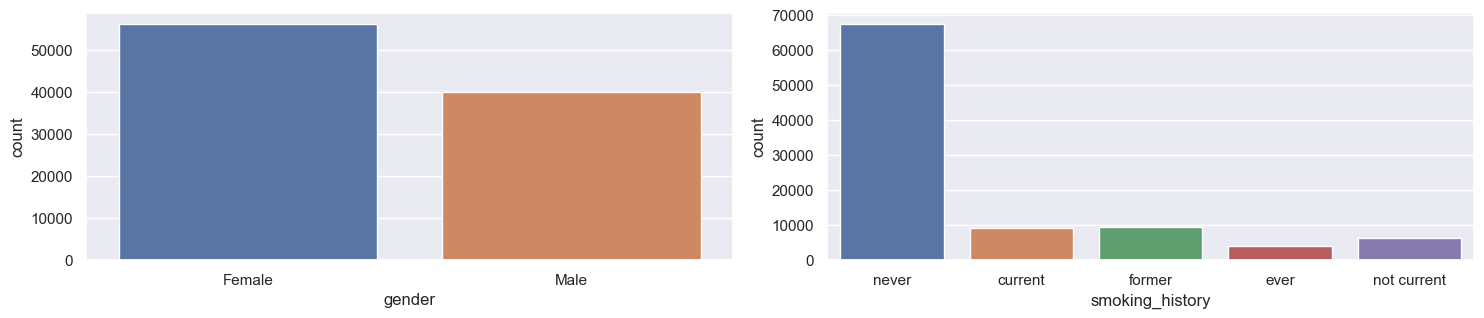

In [17]:
for i in range(0,len(catigorical_features)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[catigorical_features[i]])
    plt.tight_layout()

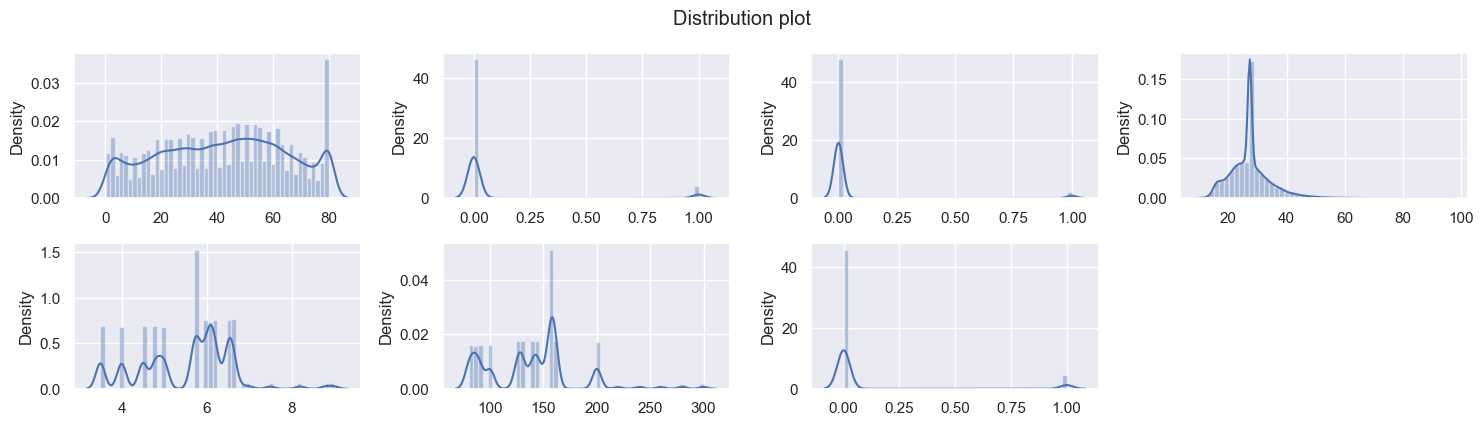

In [18]:
plt.suptitle("Distribution plot")
for i in range(0,len(numerical_features)):
    plt.subplot(3,4,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.tight_layout()

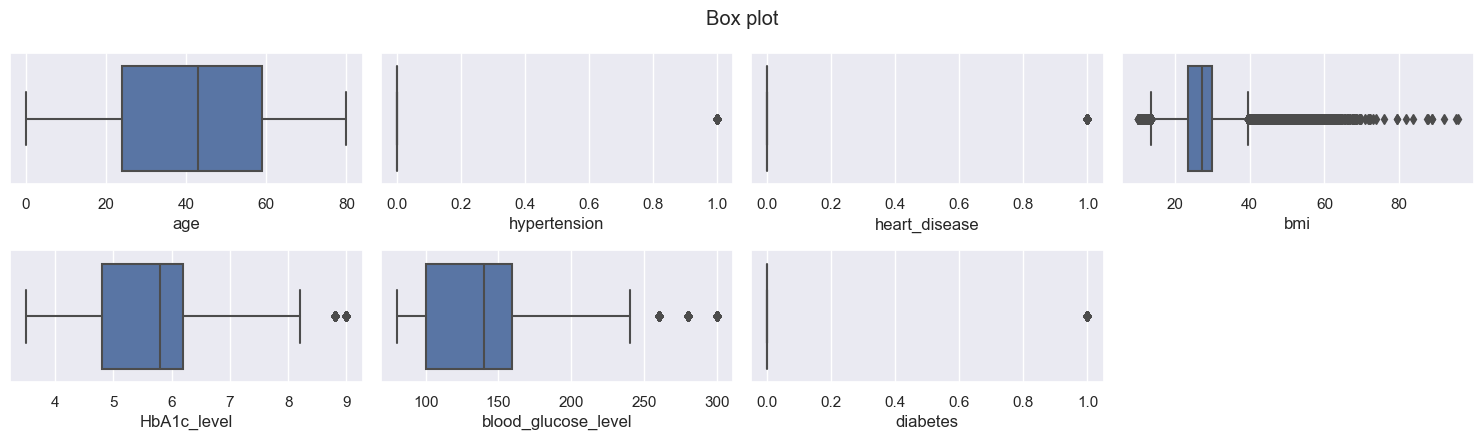

In [19]:
plt.suptitle("Box plot")
for i in range(0,len(numerical_features)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.tight_layout()

In [20]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


<AxesSubplot:xlabel='gender'>

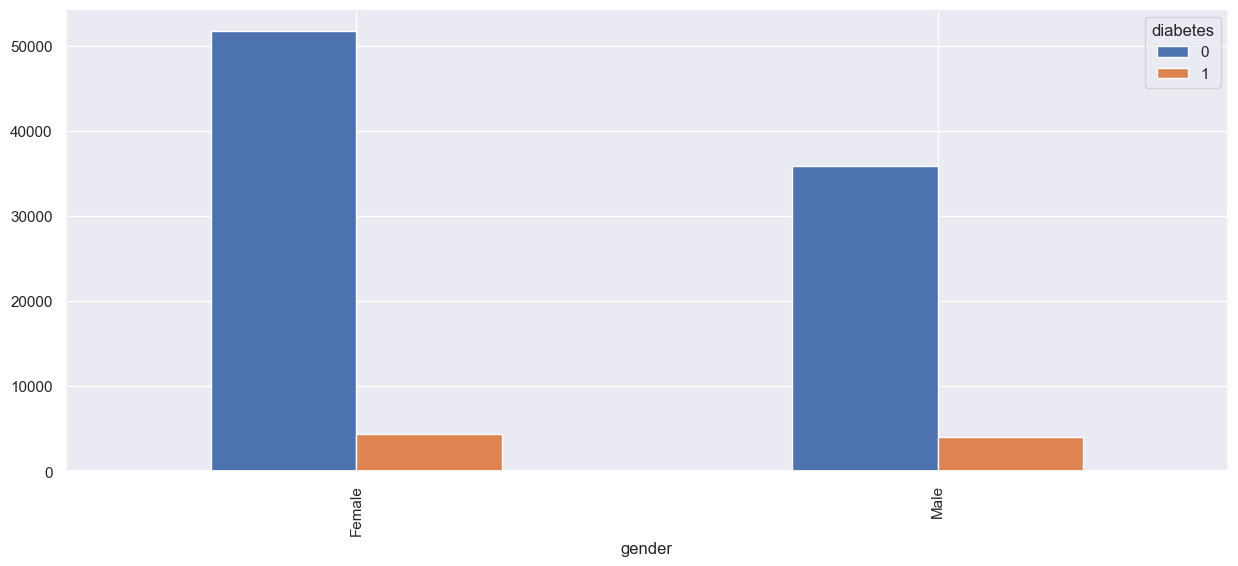

In [21]:
gender = pd.crosstab(data["gender"],data["diabetes"])
gender.plot(kind="bar")

<AxesSubplot:xlabel='smoking_history'>

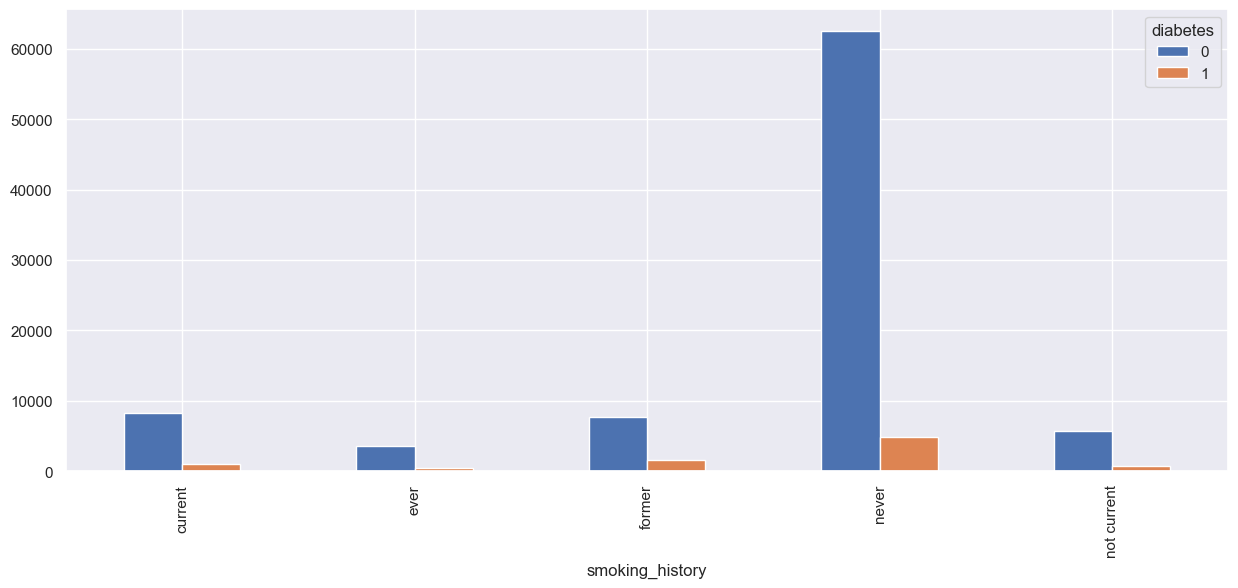

In [22]:
smoking_history = pd.crosstab(data["smoking_history"],data["diabetes"])
smoking_history.plot(kind="bar")

<AxesSubplot:xlabel='hypertension'>

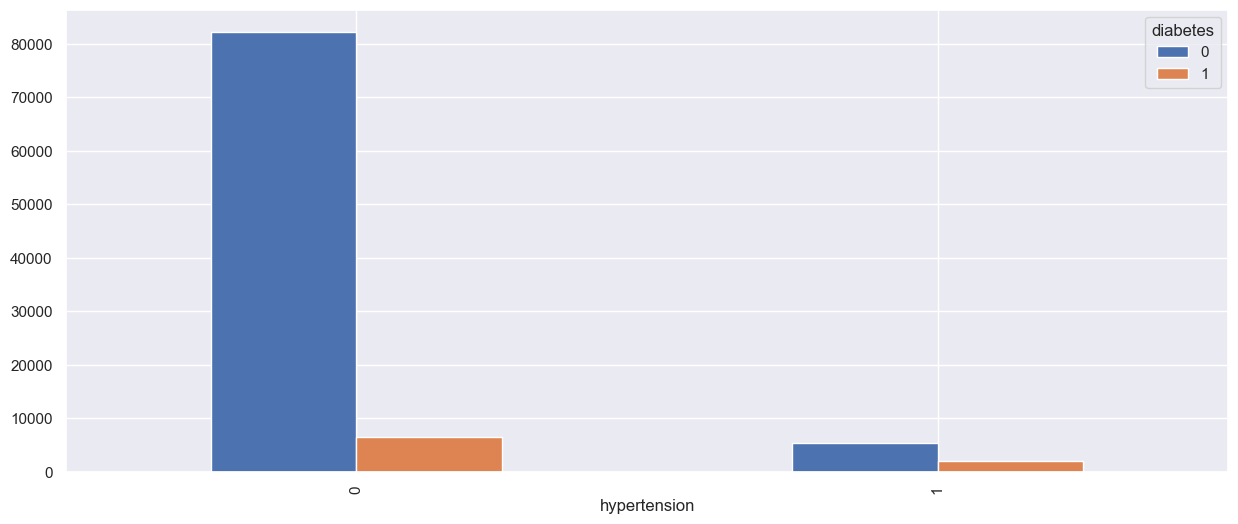

In [23]:
hypertension = pd.crosstab(data["hypertension"],data["diabetes"])
hypertension.plot(kind="bar")

<AxesSubplot:xlabel='heart_disease'>

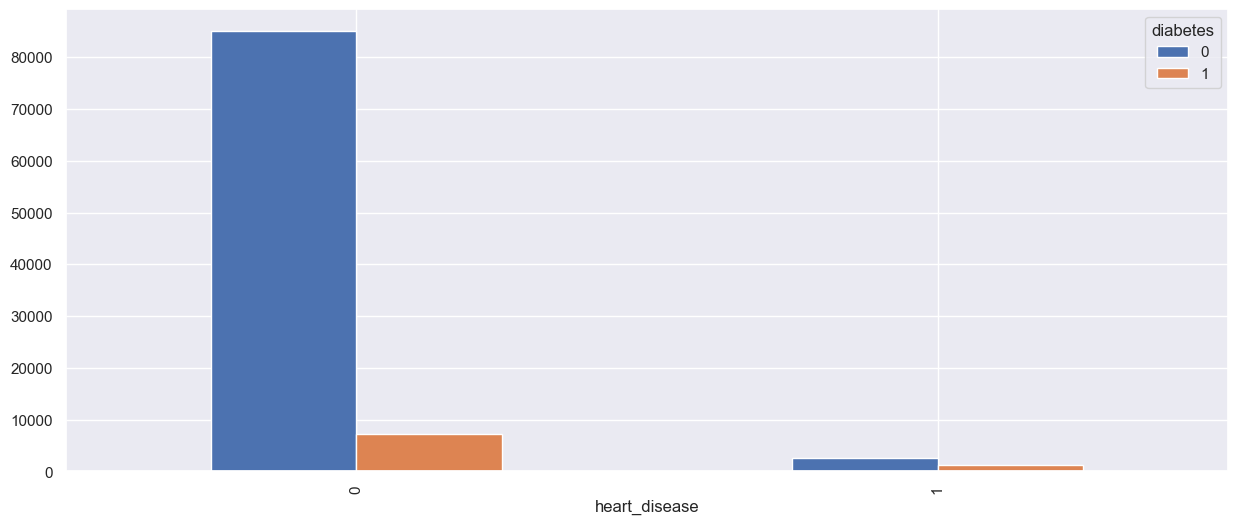

In [24]:
heart_disease = pd.crosstab(data["heart_disease"],data["diabetes"])
heart_disease.plot(kind="bar")

<AxesSubplot:ylabel='diabetes'>

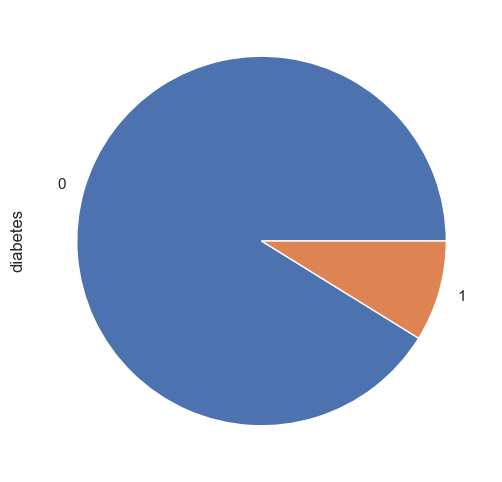

In [25]:
data["diabetes"].value_counts().plot.pie()

<AxesSubplot:>

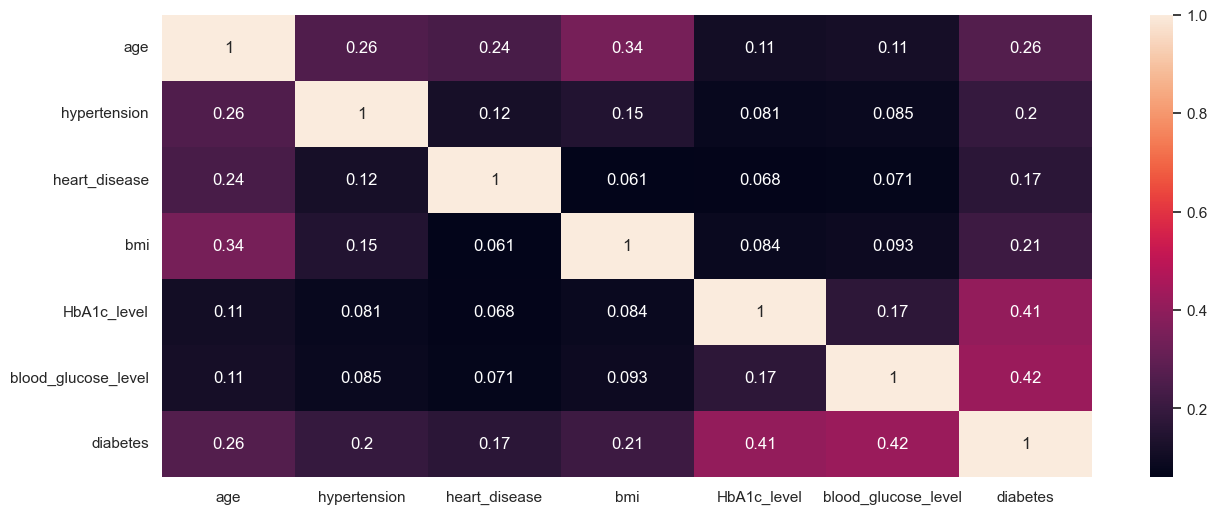

In [26]:
sns.heatmap(data.corr(),annot=True)

## Model Traning

In [27]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features = ['gender', 'smoking_history']

# loop through the categorical features and encode them
for i in categorical_features:
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [28]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,3,24.60,4.8,145,0
99996,0,2.0,0,0,3,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,3,35.42,4.0,100,0


In [29]:
x = data.drop("diabetes",axis=1)
y = data["diabetes"]

In [30]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')


In [31]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=2)
# x,y = sm.fit_resample(x,y)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [33]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# create Preprocessor Object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67302, 8)
(28844, 8)
(67302,)
(28844,)


In [36]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve,auc

In [37]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore

In [38]:
weights = {0:1,1:1.5}

In [39]:
logestic = LogisticRegression(class_weight=weights)

In [40]:
logestic.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 1.5})

In [41]:
logestic.score(X_train,y_train)

0.9513536001901876

In [42]:
y_predict = logestic.predict(X_test)

In [43]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[25684   583]
 [  838  1739]]
PRECISION_SCORE: 0.7489233419465977
RECALL_SCORE: 0.6748156771439658
F1_SCORE: 0.7099408042457643
ACCURACY_SCORE: 0.9507349882124532


(None, None, None, None, None)

In [44]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     26267
           1       0.75      0.67      0.71      2577

    accuracy                           0.95     28844
   macro avg       0.86      0.83      0.84     28844
weighted avg       0.95      0.95      0.95     28844



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
forest = RandomForestClassifier(n_estimators=100)

In [47]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
forest.score(X_train,y_train)

0.9988559032421027

In [49]:
y_predict = forest.predict(X_test)

In [50]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[26159   108]
 [  789  1788]]
PRECISION_SCORE: 0.9430379746835443
RECALL_SCORE: 0.6938300349243306
F1_SCORE: 0.7994634473507714
ACCURACY_SCORE: 0.9689016779919567


(None, None, None, None, None)

In [51]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26267
           1       0.94      0.69      0.80      2577

    accuracy                           0.97     28844
   macro avg       0.96      0.84      0.89     28844
weighted avg       0.97      0.97      0.97     28844



In [52]:
## Decision TreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
tree.score(X_train,y_train)

0.9988559032421027

In [54]:
y_predict = tree.predict(X_test)

In [55]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[25464   803]
 [  660  1917]]
PRECISION_SCORE: 0.7047794117647059
RECALL_SCORE: 0.7438882421420256
F1_SCORE: 0.7238059278837078
ACCURACY_SCORE: 0.9492788794896686


(None, None, None, None, None)

In [56]:
## Support Vector Machin
svm  = LinearSVC()

In [57]:
svm.fit(X_train,y_train)

LinearSVC()

In [58]:
svm.score(X_train,y_train)  

0.9448604796291343

In [59]:
y_predict = svm.predict(X_test)

In [60]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[26262     5]
 [ 1630   947]]
PRECISION_SCORE: 0.9947478991596639
RECALL_SCORE: 0.3674815677143966
F1_SCORE: 0.5366959478605837
ACCURACY_SCORE: 0.9433157675773124


(None, None, None, None, None)

In [61]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     26267
           1       0.99      0.37      0.54      2577

    accuracy                           0.94     28844
   macro avg       0.97      0.68      0.75     28844
weighted avg       0.95      0.94      0.93     28844



## Hyperparameter Tuening

In [62]:
## LogasticRegression
logastic1 = LogisticRegression(random_state=42)
params = {
    "penalty":["l1", "l2", "elasticnet", None],
    "class_weight":["balanced"],
    'C': [0.001, 0.01, 0.1, 1, 10],
    "solver":["lbfgs", "liblinear", "sag", "saga"]
}

In [63]:
grid_search = GridSearchCV(estimator=logastic1,param_grid=params,cv=3)

In [64]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [65]:
grid_search.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [66]:
grid_search.score(X_train,y_train)

0.8857091914059018

In [67]:
y_predict = grid_search.predict(X_test)

In [68]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     26267
           1       0.43      0.89      0.58      2577

    accuracy                           0.88     28844
   macro avg       0.71      0.89      0.76     28844
weighted avg       0.94      0.88      0.90     28844



In [69]:
## Support Vector Classifier
svm1 = LinearSVC(random_state=42)
params = {
    'C': [0.1, 1, 10],
    "penalty":["l1", "l2",],
    "loss":["hinge", "squared_hinge"],
    "class_weight":["balanced"],
}

In [70]:
grid_search = GridSearchCV(estimator=svm1,param_grid=params,cv=3)

In [71]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [72]:
grid_search.best_params_

{'C': 10, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'penalty': 'l2'}

In [73]:
grid_search.score(X_train,y_train)

0.933493804047428

In [74]:
y_predict = grid_search.predict(X_test)

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     26267
           1       1.00      0.24      0.38      2577

    accuracy                           0.93     28844
   macro avg       0.97      0.62      0.67     28844
weighted avg       0.94      0.93      0.91     28844



In [76]:
## Decision tree
tree1 = DecisionTreeClassifier(random_state=42)
params = {
    "class_weight":["balanced"],
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6,10],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]

}

In [77]:
grid_search = GridSearchCV(estimator=tree1,param_grid=params,cv=3)

In [78]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [79]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [80]:
grid_search.score(X_train,y_train)

0.9522896793557398

In [81]:
y_predict = grid_search.predict(X_test)

In [82]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     26267
           1       1.00      0.46      0.63      2577

    accuracy                           0.95     28844
   macro avg       0.97      0.73      0.80     28844
weighted avg       0.95      0.95      0.94     28844



In [83]:
## Random Forest 
forest1 = RandomForestClassifier(random_state=42)
params = {
    "class_weight":["balanced"],
    "n_estimators":[100,120],
    'max_depth': [10, 8, 5,20],
    'min_samples_split': [2, 5, 10],
}

In [84]:
grid_search = GridSearchCV(estimator=forest1,param_grid=params,cv=3)

In [85]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 8, 5, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 120]})

In [86]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 120}

In [87]:
grid_search.score(X_train,y_train)

0.9957504977563817

In [88]:
y_predict = grid_search.predict(X_test)

In [89]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26267
           1       0.87      0.71      0.78      2577

    accuracy                           0.97     28844
   macro avg       0.92      0.85      0.88     28844
weighted avg       0.96      0.97      0.96     28844



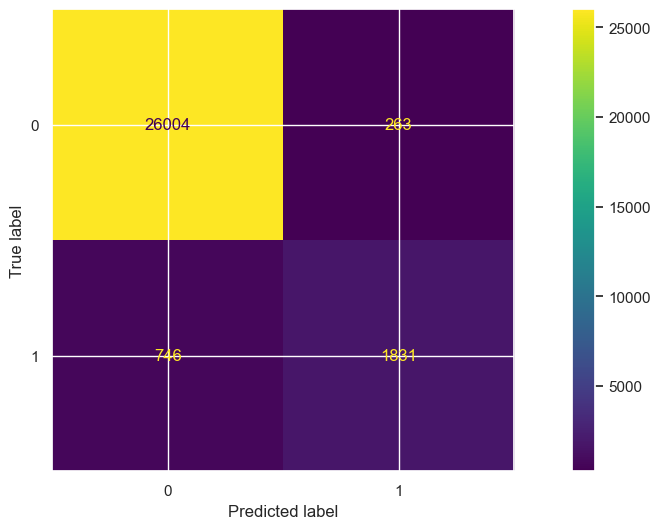

In [90]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [91]:
data.to_csv("Clean_diabetes.csv",index=False)


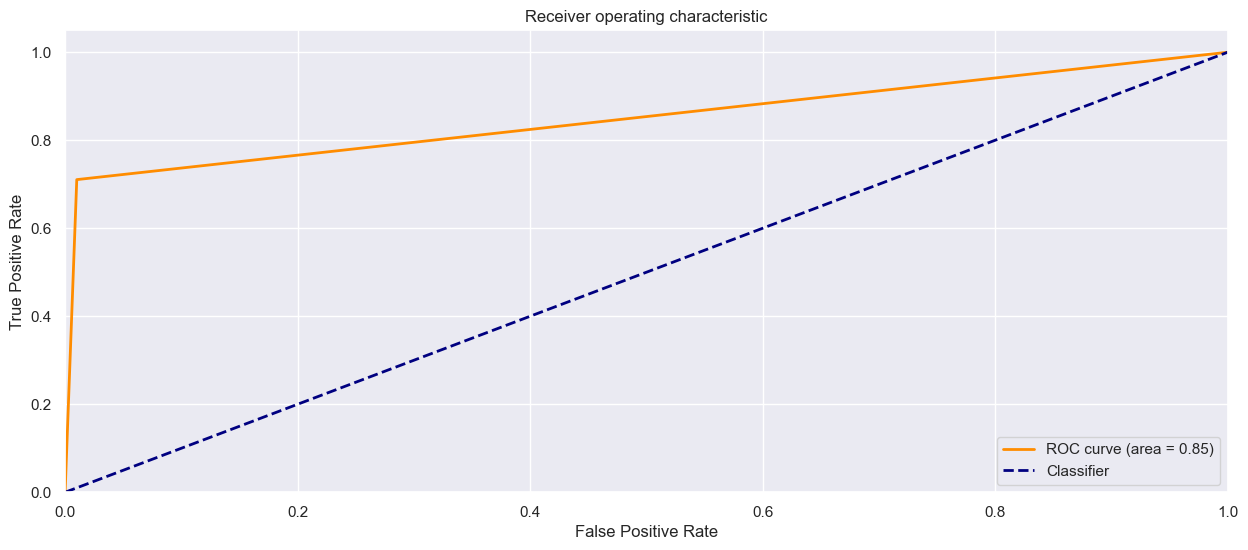

In [92]:
rf_fpr, rf_tpr, rf_ = roc_curve(y_test, y_predict)
rf_roc_auc = auc(rf_fpr, rf_tpr)
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [95]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,3,24.60,4.8,145,0
99996,0,2.0,0,0,3,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,3,35.42,4.0,100,0


In [96]:
data["smoking_history"].unique()

array([3, 0, 2, 1, 4])